<a href="https://colab.research.google.com/github/ehlatham/PUS2022_ELathamGray/blob/main/HW4/REVISED_EL_H4_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I got a lot of help from Coryn, Emmanuel, and yourself.

Importing libraries

In [ ]:
import pandas as pd
!pip install folium


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geopandas
!apt install python3-rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [ ]:
import geopandas as gpd
#importing libraries

# interacting with hosting site
import urllib3
from bs4 import BeautifulSoup

# getting and reading files
import os
import glob
import pandas as pd

# geospatial analysis 
from shapely.geometry import Point, LineString
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# Need to use matplotlib colormaps to map colors to variables' values

from matplotlib import cm

import matplotlib.pyplot as plt


In [ ]:
gpd.GeoDataFrame.from_file("https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=GeoJSON")

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ..."
1,MN19,1906016.44662,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ..."
2,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
3,MN17,1864600.43538,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."
4,MN17,1890907.25105,Midtown-Midtown South,5699.86064037,Manhattan,3807,011300,1,I,1011300,113,"MULTIPOLYGON (((-73.98412 40.75484, -73.98460 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2160,QN06,2640087.92597,Jamaica Estates-Holliswood,8957.03223214,Queens,4106,045800,4,E,4045800,458,"MULTIPOLYGON (((-73.79140 40.71302, -73.79134 ..."
2161,QN61,2685779.85127,Jamaica,6936.2772582,Queens,4112,046200,4,E,4046200,462,"MULTIPOLYGON (((-73.78431 40.70793, -73.78479 ..."
2162,QN06,2591346.57809,Jamaica Estates-Holliswood,7923.92512634,Queens,4106,046600,4,E,4046600,466,"MULTIPOLYGON (((-73.78059 40.71343, -73.78178 ..."
2163,MN04,1621656.47489,Hamilton Heights,5486.85555347,Manhattan,3802,022700,1,E,1022700,227,"MULTIPOLYGON (((-73.94292 40.82326, -73.94324 ..."


Checking the data type, I can see here that it is in feet and an area of New York

In [ ]:
ct_shape = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=GeoJSON")

In [ ]:
ct_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
ct_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ntacode      2165 non-null   object  
 1   shape_area   2165 non-null   object  
 2   ntaname      2165 non-null   object  
 3   shape_leng   2165 non-null   object  
 4   boro_name    2165 non-null   object  
 5   puma         2165 non-null   object  
 6   ct2010       2165 non-null   object  
 7   boro_code    2165 non-null   object  
 8   cdeligibil   2164 non-null   object  
 9   boro_ct2010  2165 non-null   object  
 10  ctlabel      2165 non-null   object  
 11  geometry     2165 non-null   geometry
dtypes: geometry(1), object(11)
memory usage: 203.1+ KB


Here we can see the shape of the infromation, and we can see that we can see that we are only missing one piece of information, in the cdeligibil column

In [ ]:
ct_shape.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/usr/local/lib/python3.7/dist-packages/pandas/i

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
count,2165,2165,2165,2165,2165,2165,2165,2165,2164,2165,2165,2165
unique,195,2165,195,2165,5,55,1335,5,2,2165,1335,2165
top,BK50,2497009.71359,Canarsie,7729.01679383,Brooklyn,4009,003300,3,E,5000900,33,(POLYGON ((-74.07920577013245 40.6434307837457...
freq,34,1,34,1,760,83,5,760,1167,1,5,1


Visualize the Cenus Tract bountries colored by bourghs 

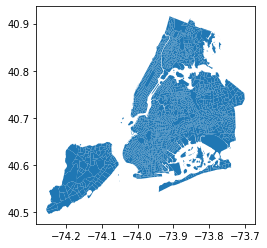

In [ ]:
ct_shape.plot()

Here I can see the area plotted, and the area plotted with the different boroughs

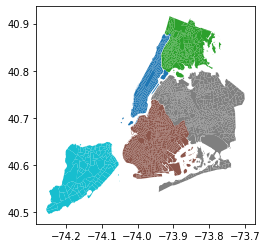

In [ ]:
ct_shape.plot(column='boro_code')

# FBB missing axis labels

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ct_shape.geometry.area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0       0.000025
1       0.000019
2       0.000018
3       0.000018
4       0.000019
          ...   
2160    0.000026
2161    0.000027
2162    0.000026
2163    0.000016
2164    0.000008
Length: 2165, dtype: float64

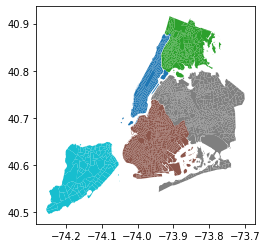

In [ ]:
ct_shape.plot(column="boro_code")


# FBB missing axis labels

MEASURE AREAS

In [ ]:
#Converting the degrees into US feet. 
ct_shape = ct_shape.to_crs("EPSG:2263")
ct_shape.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
ct_shape.head()

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((962269.126 173705.500, 962288...."
1,MN19,1906016.44662,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((994133.507 214848.898, 994005...."
2,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((992216.539 216507.687, 992091...."
3,MN17,1864600.43538,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((991325.882 217001.689, 991199...."
4,MN17,1890907.25105,Midtown-Midtown South,5699.86064037,Manhattan,3807,011300,1,I,1011300,113,"MULTIPOLYGON (((988650.277 214286.402, 988517...."


In [ ]:
ct_shape.to_crs("EPSG:2263")

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((962269.126 173705.500, 962288...."
1,MN19,1906016.44662,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((994133.507 214848.898, 994005...."
2,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((992216.539 216507.687, 992091...."
3,MN17,1864600.43538,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((991325.882 217001.689, 991199...."
4,MN17,1890907.25105,Midtown-Midtown South,5699.86064037,Manhattan,3807,011300,1,I,1011300,113,"MULTIPOLYGON (((988650.277 214286.402, 988517...."
...,...,...,...,...,...,...,...,...,...,...,...,...
2160,QN06,2640087.92597,Jamaica Estates-Holliswood,8957.03223214,Queens,4106,045800,4,E,4045800,458,"MULTIPOLYGON (((1042078.980 199118.126, 104209..."
2161,QN61,2685779.85127,Jamaica,6936.2772582,Queens,4112,046200,4,E,4046200,462,"MULTIPOLYGON (((1044049.351 197268.556, 104391..."
2162,QN06,2591346.57809,Jamaica Estates-Holliswood,7923.92512634,Queens,4106,046600,4,E,4046600,466,"MULTIPOLYGON (((1045076.166 199273.805, 104474..."
2163,MN04,1621656.47489,Hamilton Heights,5486.85555347,Manhattan,3802,022700,1,E,1022700,227,"MULTIPOLYGON (((1000046.910 239218.373, 999960..."


Now we can see that the geometry is no longer in long/lad

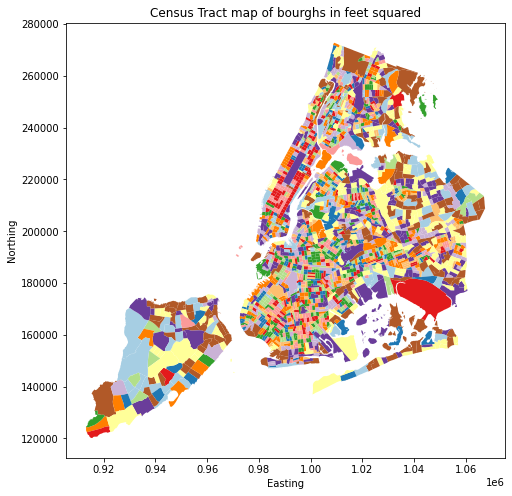

In [ ]:
#Geo-visualizating the census tracts data in Feet
f, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
ct_shape.plot(column='shape_area', alpha=1, linewidth=0.5,
              ax=ax, cmap='Paired')
plt.title("Census Tract map of bourghs in feet squared");


# FBB a better colormap would be one that changes color linearly with the selected variable: for example going from white to read ("red") so that one can tell what is bigger and what is smaller at a glance

In [ ]:
ct_shape.geometry.area

0       2.497010e+06
1       1.906016e+06
2       1.860993e+06
3       1.864600e+06
4       1.890907e+06
            ...     
2160    2.640076e+06
2161    2.685748e+06
2162    2.591319e+06
2163    1.621656e+06
2164    8.120950e+05
Length: 2165, dtype: float64

In [ ]:
ct_shape.to_crs("EPSG:2263").geometry.area

0       2.497010e+06
1       1.906016e+06
2       1.860993e+06
3       1.864600e+06
4       1.890907e+06
            ...     
2160    2.640076e+06
2161    2.685748e+06
2162    2.591319e+06
2163    1.621656e+06
2164    8.120950e+05
Length: 2165, dtype: float64

Now I'll create the new columm by multiplying our area by 3.587e-8, which is the conversion from feet squared to miles squared

In [ ]:
ct_shape["shape_areami2"] = ct_shape.to_crs("EPSG:2263").geometry.area * 3.587e-8
ct_shape

,ntacode,shape_area,ntaname,shape_leng,boro_name,puma,ct2010,boro_code,cdeligibil,boro_ct2010,ctlabel,geometry,shape_areami2
0,SI22,2497009.71359,West New Brighton-New Brighton-St. George,7729.01679383,Staten Island,3903,000900,5,E,5000900,9,"MULTIPOLYGON (((962269.126 173705.500, 962288....",0.089568
1,MN19,1906016.44662,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,98,"MULTIPOLYGON (((994133.507 214848.898, 994005....",0.068369
2,MN17,1860992.68163,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,102,"MULTIPOLYGON (((992216.539 216507.687, 992091....",0.066754
3,MN17,1864600.43538,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,104,"MULTIPOLYGON (((991325.882 217001.689, 991199....",0.066883
4,MN17,1890907.25105,Midtown-Midtown South,5699.86064037,Manhattan,3807,011300,1,I,1011300,113,"MULTIPOLYGON (((988650.277 214286.402, 988517....",0.067827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,QN06,2640087.92597,Jamaica Estates-Holliswood,8957.03223214,Queens,4106,045800,4,E,4045800,458,"MULTIPOLYGON (((1042078.980 199118.126, 104209...",0.094700
2161,QN61,2685779.85127,Jamaica,6936.2772582,Queens,4112,046200,4,E,4046200,462,"MULTIPOLYGON (((1044049.351 197268.556, 104391...",0.096338
2162,QN06,2591346.57809,Jamaica Estates-Holliswood,7923.92512634,Queens,4106,046600,4,E,4046600,466,"MULTIPOLYGON (((1045076.166 199273.805, 104474...",0.092951
2163,MN04,1621656.47489,Hamilton Heights,5486.85555347,Manhattan,3802,022700,1,E,1022700,227,"MULTIPOLYGON (((1000046.910 239218.373, 999960...",0.058169


In [ ]:
ct_shape.to_crs("EPSG:2263")
ct_shape["shape_area"] = ct_shape.to_crs("EPSG:2263").geometry.area


In [ ]:
ct_shape["shape_area"] 

0       2.497010e+06
1       1.906016e+06
2       1.860993e+06
3       1.864600e+06
4       1.890907e+06
            ...     
2160    2.640076e+06
2161    2.685748e+06
2162    2.591319e+06
2163    1.621656e+06
2164    8.120950e+05
Name: shape_area, Length: 2165, dtype: float64

Now, I'll compare them, 

In [ ]:
ct_shape[["shape_area", "shape_areami2"]]

,shape_area,shape_areami2
0,2.497010e+06,0.089568
1,1.906016e+06,0.068369
2,1.860993e+06,0.066754
3,1.864600e+06,0.066883
4,1.890907e+06,0.067827
...,...,...
2160,2.640076e+06,0.094700
2161,2.685748e+06,0.096338
2162,2.591319e+06,0.092951
2163,1.621656e+06,0.058169


In [ ]:
NYC_Area = (ct_shape["shape_areami2"].sum())
print ('The total New York City land area is equal to [:.0f](mi^2)'.format(NYC_Area))

The total New York City land area is equal to [:.0f](mi^2)


I checked! NYC is 302.6 square miles!

In [ ]:
ct_shape["shape_areami2"].sum()

302.1329029228141

This is it in feet

In [ ]:
ct_shape["shape_area"].sum()

8422997014.854029

 # FBB good but its **squared** feet

CHOROPLETHS OF NYC

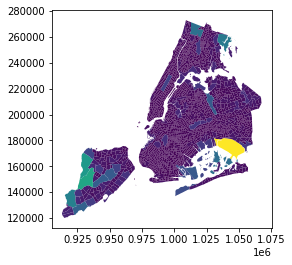

In [ ]:
ct_shape.plot(column="shape_area")

I'm not 100% as to why these look so different. One is measured in feet (shape_area) the other in miles (shape_areami2), but the physical areas they measure hasn't changed. 
Ps when I ran this originally, it was super colorful, but then I ran it again, after converint shape_area to a numerical and not it looks the same. 

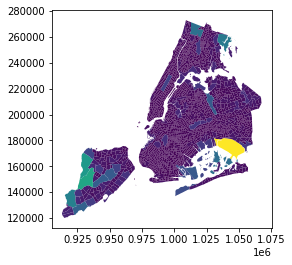

In [ ]:
ct_shape.plot(column="shape_areami2")

# FBB It has not changed because the color map has adapted to the range of the data

In [ ]:
ct_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ntacode        2165 non-null   object  
 1   shape_area     2165 non-null   float64 
 2   ntaname        2165 non-null   object  
 3   shape_leng     2165 non-null   object  
 4   boro_name      2165 non-null   object  
 5   puma           2165 non-null   object  
 6   ct2010         2165 non-null   object  
 7   boro_code      2165 non-null   object  
 8   cdeligibil     2164 non-null   object  
 9   boro_ct2010    2165 non-null   object  
 10  ctlabel        2165 non-null   object  
 11  geometry       2165 non-null   geometry
 12  shape_areami2  2165 non-null   float64 
dtypes: float64(2), geometry(1), object(10)
memory usage: 220.0+ KB


In [ ]:
#Passing shape_area to numeric
ct_shape['shape_area'] = pd.to_numeric(ct_shape['shape_area']) 
ct_shape["shape_area"]

0       2.497010e+06
1       1.906016e+06
2       1.860993e+06
3       1.864600e+06
4       1.890907e+06
            ...     
2160    2.640076e+06
2161    2.685748e+06
2162    2.591319e+06
2163    1.621656e+06
2164    8.120950e+05
Name: shape_area, Length: 2165, dtype: float64

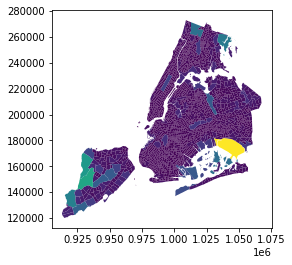

In [ ]:
ct_shape.plot(column="shape_area")

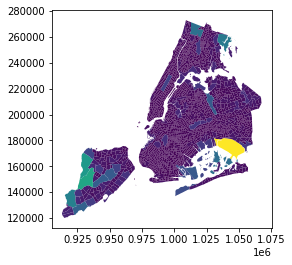

In [ ]:
ct_shape.plot(column="shape_areami2")

They look the same now! Is that because beofre one was numerica and the other wasn't? And now that shape_area is converted it looks the same 

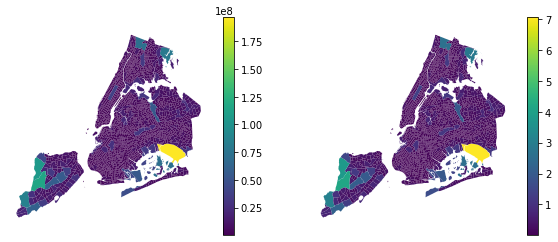

In [ ]:
#putting numeric values to colors 
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ct_shape.plot(column="shape_area", legend=True, ax=ax)
ax.axis('off');
ax = fig.add_subplot(122)
ct_shape.plot(column="shape_areami2", legend=True, ax=ax)
ax.axis('off');

# FBB good

In [ ]:
#installing mapclassify
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


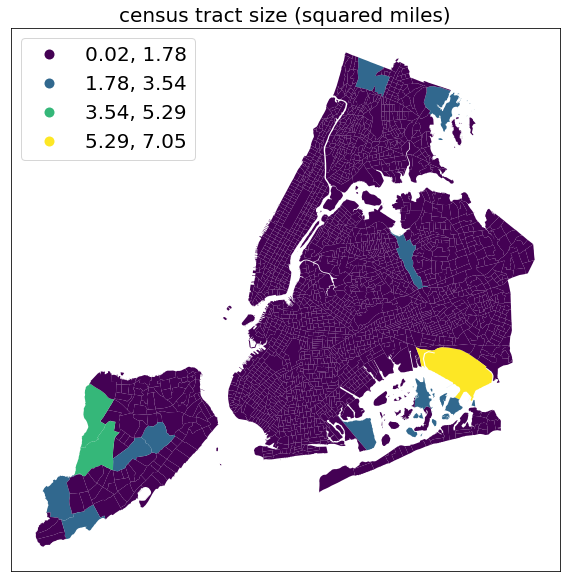

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='shape_areami2', cmap='viridis', alpha=1,
              linewidth=0.1, ax=ax, scheme="Equal_interval", 
              legend=True, k=4, legend_kwds={'loc': 'upper left', 'fontsize':20});
plt.title("census tract size (squared miles)", fontsize=20);

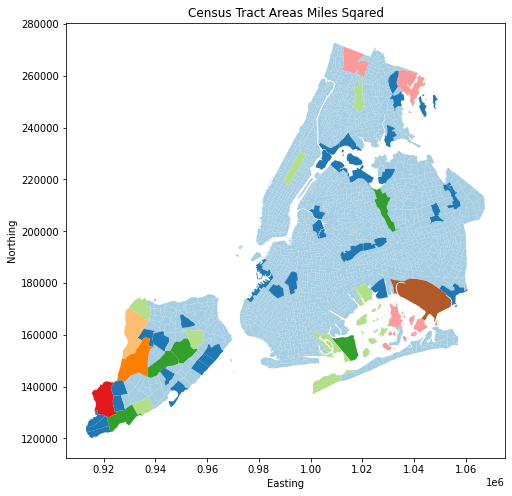

In [ ]:
#Geo-visualizating the census tracts data in Feet
f, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Easting")
ax.set_ylabel("Northing")
ct_shape.plot(column='shape_areami2', alpha=1, linewidth=0.5,
              ax=ax, cmap='Paired')
plt.title("Census Tract Areas Miles Sqared");

2 EXPLORE CITIBIKE DATA

In [ ]:
cb201609 = pd.read_csv('https://s3.amazonaws.com/tripdata/201609-citibike-tripdata.zip', index_col='starttime')
cb201609.head()

,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,
9/1/2016 00:00:02,975,9/1/2016 00:16:18,312,Allen St & Stanton St,40.722055,-73.989111,313,Washington Ave & Park Ave,40.696102,-73.967510,22609,Subscriber,1985.0,1
9/1/2016 00:00:04,1220,9/1/2016 00:20:25,316,Fulton St & William St,40.709560,-74.006536,239,Willoughby St & Fleet St,40.691966,-73.981302,16966,Subscriber,1977.0,2
9/1/2016 00:00:19,308,9/1/2016 00:05:27,479,9 Ave & W 45 St,40.760193,-73.991255,448,W 37 St & 10 Ave,40.756604,-73.997901,25601,Subscriber,1983.0,1
9/1/2016 00:00:25,250,9/1/2016 00:04:35,297,E 15 St & 3 Ave,40.734232,-73.986923,487,E 20 St & FDR Drive,40.733143,-73.975739,22094,Subscriber,1953.0,1
9/1/2016 00:00:25,439,9/1/2016 00:07:45,494,W 26 St & 8 Ave,40.747348,-73.997236,533,Broadway & W 39 St,40.752996,-73.987216,16319,Subscriber,1985.0,1


In [ ]:
cb201609.head()

,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,
9/1/2016 00:00:02,975,9/1/2016 00:16:18,312,Allen St & Stanton St,40.722055,-73.989111,313,Washington Ave & Park Ave,40.696102,-73.967510,22609,Subscriber,1985.0,1
9/1/2016 00:00:04,1220,9/1/2016 00:20:25,316,Fulton St & William St,40.709560,-74.006536,239,Willoughby St & Fleet St,40.691966,-73.981302,16966,Subscriber,1977.0,2
9/1/2016 00:00:19,308,9/1/2016 00:05:27,479,9 Ave & W 45 St,40.760193,-73.991255,448,W 37 St & 10 Ave,40.756604,-73.997901,25601,Subscriber,1983.0,1
9/1/2016 00:00:25,250,9/1/2016 00:04:35,297,E 15 St & 3 Ave,40.734232,-73.986923,487,E 20 St & FDR Drive,40.733143,-73.975739,22094,Subscriber,1953.0,1
9/1/2016 00:00:25,439,9/1/2016 00:07:45,494,W 26 St & 8 Ave,40.747348,-73.997236,533,Broadway & W 39 St,40.752996,-73.987216,16319,Subscriber,1985.0,1


In [ ]:
cb201609.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1648856 entries, 9/1/2016 00:00:02 to 9/30/2016 23:59:51
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             1648856 non-null  int64  
 1   stoptime                 1648856 non-null  object 
 2   start station id         1648856 non-null  int64  
 3   start station name       1648856 non-null  object 
 4   start station latitude   1648856 non-null  float64
 5   start station longitude  1648856 non-null  float64
 6   end station id           1648856 non-null  int64  
 7   end station name         1648856 non-null  object 
 8   end station latitude     1648856 non-null  float64
 9   end station longitude    1648856 non-null  float64
 10  bikeid                   1648856 non-null  int64  
 11  usertype                 1648856 non-null  object 
 12  birth year               1433341 non-null  float64
 13  gender              

Here I can see that five of the columns are integers (whole numbers) four are objects, and five are floating. These are trips throughout the month of Sept. 2016.

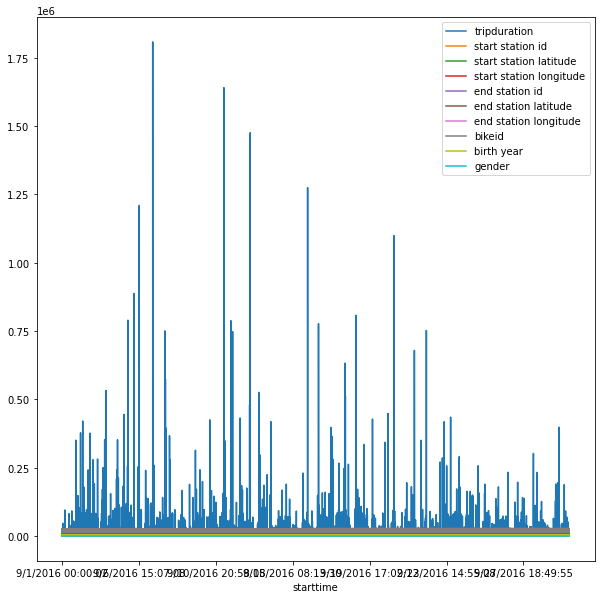

In [ ]:
#I wanted to see if I could plot it... i can
cb201609.plot(figsize=(10,10))

# FBB rotate the axes labels so they can be read, but good plot to make!

2.3 Map CitiBike Data at the cenus tract level 

In [ ]:
#Grouped by start start station id, and new df created
cbstations = cb201609.groupby("start station id").first()
cbstations.head()

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
start station id,,,,,,,,,,,,,
72,944,9/1/2016 00:41:52,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,22738,Subscriber,1989.0,2
79,303,9/1/2016 07:13:30,Franklin St & W Broadway,40.719116,-74.006667,152,Warren St & Church St,40.714740,-74.009106,19043,Subscriber,1984.0,2
82,208,9/1/2016 00:46:55,St James Pl & Pearl St,40.711174,-74.000165,331,Pike St & Monroe St,40.711731,-73.991930,25627,Subscriber,1989.0,1
83,301,9/1/2016 00:44:26,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3416,7 Ave & Park Pl,40.677615,-73.973243,18079,Subscriber,1980.0,2
116,858,9/1/2016 00:15:31,W 17 St & 8 Ave,40.741776,-74.001497,116,W 17 St & 8 Ave,40.741776,-74.001497,18605,Subscriber,1988.0,1


In [ ]:
from shapely.geometry import Point, LineString
#import urllib3
#from bs4 import BeautifulSoup
from folium.plugins import MarkerCluster
from matplotlib import cm




# FBB move imports to the top

In [ ]:
#Pairing the start long/lat points
cbstations["lonlat"] = cbstations[["start station longitude", "start station latitude"]].apply(lambda x:
                                                                        Point(x['start station longitude'], x['start station latitude']), axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [ ]:
cbstations.head()

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lonlat
start station id,,,,,,,,,,,,,,
72,944,9/1/2016 00:41:52,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,22738,Subscriber,1989.0,2,POINT (-73.99392888 40.76727216)
79,303,9/1/2016 07:13:30,Franklin St & W Broadway,40.719116,-74.006667,152,Warren St & Church St,40.714740,-74.009106,19043,Subscriber,1984.0,2,POINT (-74.00666661 40.71911552)
82,208,9/1/2016 00:46:55,St James Pl & Pearl St,40.711174,-74.000165,331,Pike St & Monroe St,40.711731,-73.991930,25627,Subscriber,1989.0,1,POINT (-74.00016545 40.71117416)
83,301,9/1/2016 00:44:26,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3416,7 Ave & Park Pl,40.677615,-73.973243,18079,Subscriber,1980.0,2,POINT (-73.97632328 40.68382604)
116,858,9/1/2016 00:15:31,W 17 St & 8 Ave,40.741776,-74.001497,116,W 17 St & 8 Ave,40.741776,-74.001497,18605,Subscriber,1988.0,1,POINT (-74.00149746 40.74177603)


In [ ]:

#Connecting them to make actual coordinance 
#def makeline(x, y):
  #try: 
   # _ = LineString([x, y])
  #except IndexError:
    #_ =  LineString([(0,0), (0,0)])
 # return _

#makeline(x['starcbstations["trajectories"] = cbstations[["startlonlat", "endlonlat"]].apply(lambda x: 
         #tlonlat'], x['endlonlat']), axis=1)

In [ ]:
cbstations.head()

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lonlat
start station id,,,,,,,,,,,,,,
72,944,9/1/2016 00:41:52,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,22738,Subscriber,1989.0,2,POINT (-73.99392888 40.76727216)
79,303,9/1/2016 07:13:30,Franklin St & W Broadway,40.719116,-74.006667,152,Warren St & Church St,40.714740,-74.009106,19043,Subscriber,1984.0,2,POINT (-74.00666661 40.71911552)
82,208,9/1/2016 00:46:55,St James Pl & Pearl St,40.711174,-74.000165,331,Pike St & Monroe St,40.711731,-73.991930,25627,Subscriber,1989.0,1,POINT (-74.00016545 40.71117416)
83,301,9/1/2016 00:44:26,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3416,7 Ave & Park Pl,40.677615,-73.973243,18079,Subscriber,1980.0,2,POINT (-73.97632328 40.68382604)
116,858,9/1/2016 00:15:31,W 17 St & 8 Ave,40.741776,-74.001497,116,W 17 St & 8 Ave,40.741776,-74.001497,18605,Subscriber,1988.0,1,POINT (-74.00149746 40.74177603)


In [ ]:
#transforming to geodataframe, renamine geometry to lonlat for consistancy, and seting crs to 4326(the world)
cbstations = gpd.GeoDataFrame(cbstations)
cbstations["geometry"] = cbstations["lonlat"]
cbstations = cbstations.set_crs("EPSG:4326")

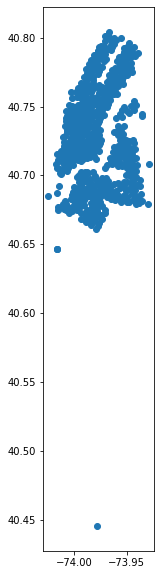

In [ ]:
cbstations.plot(figsize=(10,10))

In [ ]:
cbstations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 616 entries, 72 to 3436
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   tripduration             616 non-null    int64   
 1   stoptime                 616 non-null    object  
 2   start station name       616 non-null    object  
 3   start station latitude   616 non-null    float64 
 4   start station longitude  616 non-null    float64 
 5   end station id           616 non-null    int64   
 6   end station name         616 non-null    object  
 7   end station latitude     616 non-null    float64 
 8   end station longitude    616 non-null    float64 
 9   bikeid                   616 non-null    int64   
 10  usertype                 616 non-null    object  
 11  birth year               616 non-null    float64 
 12  gender                   616 non-null    int64   
 13  lonlat                   616 non-null    object  
 14  

In [ ]:
#Setting our CRS to 2263(NYC)
cbstations = cbstations.to_crs("EPSG:2263")

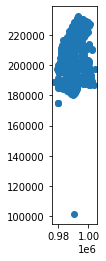

In [ ]:
cbstations.plot()

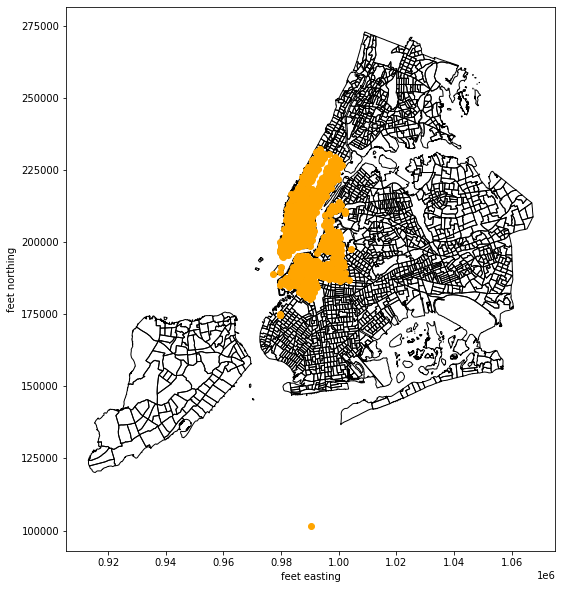

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_shape.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, c='orange');

In [ ]:
cbstations["start station latitude"].min()

40.44535

In [ ]:
cbstations = cbstations[cbstations["start station latitude"] > 40.44535]

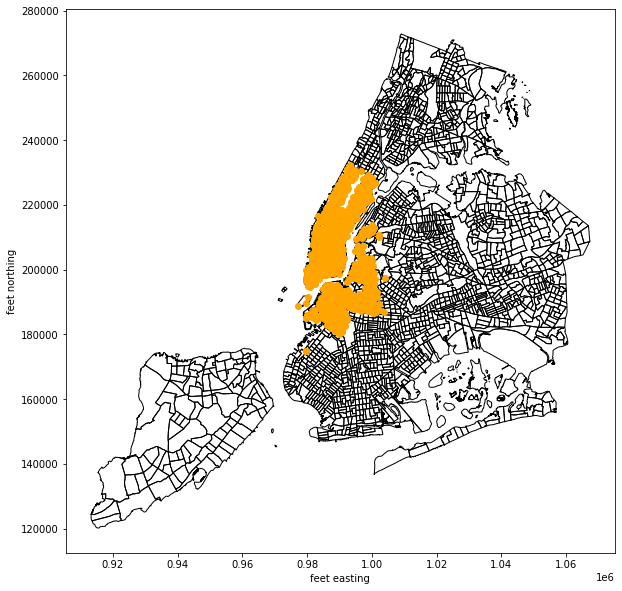

In [ ]:
#Cleaned it up, so there's no lonely dot!
f, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_shape.plot(ax=ax, color="None", edgecolor='k')
cbstations.plot(ax=ax, c='orange');

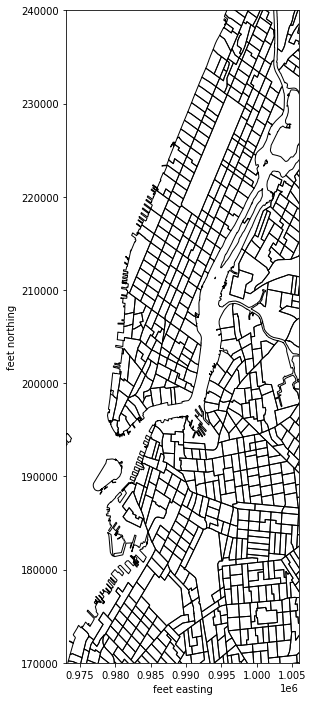

In [ ]:
#Coryn helped me center it, so that I could really see what was gong on.
f, ax = plt.subplots(figsize=(12,12))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_shape.plot(ax=ax, color="None", edgecolor='k')
ax.set_xlim(left=973000, right=1006000);
ax.set_ylim(top=240000, bottom=170000);
cbstations.plot(ax=ax, c='orange');


In [ ]:
cbstations["boro_name"] = ''
# check for each citibike stations to see what CT they are belong to
for i in cbstations.index:
    a = ct_shape[ct_shape.geometry.intersects(
        cbstations.loc[i].geometry)]["boro_name"].values[0]
    
    cbstations.loc[i,'boro_name'] = a

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [ ]:
#Now I can see the boro names!
cbstations.head()

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lonlat,geometry,boro_name
start station id,,,,,,,,,,,,,,,,
72,944,9/1/2016 00:41:52,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,22738,Subscriber,1989.0,2,POINT (-73.99392888 40.76727216),POINT (985931.707 218814.757),Manhattan
79,303,9/1/2016 07:13:30,Franklin St & W Broadway,40.719116,-74.006667,152,Warren St & Church St,40.714740,-74.009106,19043,Subscriber,1984.0,2,POINT (-74.00666661 40.71911552),POINT (982402.007 201269.770),Manhattan
82,208,9/1/2016 00:46:55,St James Pl & Pearl St,40.711174,-74.000165,331,Pike St & Monroe St,40.711731,-73.991930,25627,Subscriber,1989.0,1,POINT (-74.00016545 40.71117416),POINT (984204.132 198376.421),Manhattan
83,301,9/1/2016 00:44:26,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,3416,7 Ave & Park Pl,40.677615,-73.973243,18079,Subscriber,1980.0,2,POINT (-73.97632328 40.68382604),POINT (990816.693 188413.578),Brooklyn
116,858,9/1/2016 00:15:31,W 17 St & 8 Ave,40.741776,-74.001497,116,W 17 St & 8 Ave,40.741776,-74.001497,18605,Subscriber,1988.0,1,POINT (-74.00149746 40.74177603),POINT (983835.043 209525.635),Manhattan


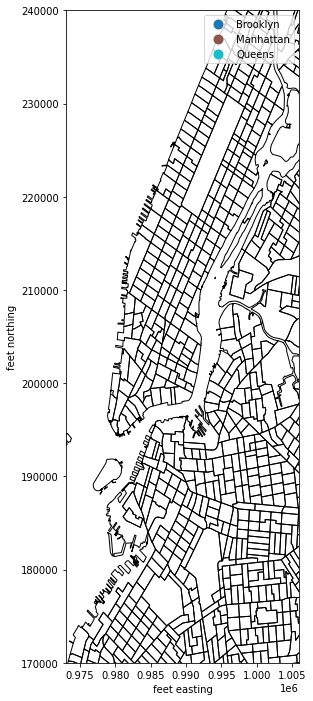

In [ ]:
#I had colors. I don't know where they went 
f, ax = plt.subplots(figsize=(12,12))
ax.set_xlabel("feet easting")
ax.set_ylabel("feet northing")
#ct_shape.boundary.plot(ax=ax, alpha=0.5)
ct_shape.plot(ax=ax, color="None", edgecolor='k')
ax.set_xlim(left=973000, right=1006000)
ax.set_ylim(top=240000, bottom=170000)
cbstations.plot(ax=ax, column = "boro_name", legend=True);



# FBB I am not sure why these two plots did not render correctly. -you are missing the data poinnts, although you got the zoom right. 

In [ ]:
cbstationsWct = gpd.tools.sjoin(ct_shape, cbstations)
cbstationsWct

,ntacode,shape_area,ntaname,shape_leng,boro_name_left,puma,ct2010,boro_code,cdeligibil,boro_ct2010,...,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lonlat,boro_name_right
1,MN19,1.906016e+06,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,...,3140,1 Ave & E 78 St,40.771404,-73.953517,19938,Customer,1990.0,0,POINT (-73.96592976 40.75455731),Manhattan
1,MN19,1.906016e+06,Turtle Bay-East Midtown,5534.20030825,Manhattan,3808,009800,1,I,1009800,...,401,Allen St & Rivington St,40.720196,-73.989978,15618,Subscriber,1992.0,1,POINT (-73.967416 40.756014),Manhattan
2,MN17,1.860993e+06,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,...,530,11 Ave & W 59 St,40.771522,-73.990541,24994,Subscriber,1965.0,1,POINT (-73.97402311 40.7597108),Manhattan
2,MN17,1.860993e+06,Midtown-Midtown South,5687.80243891,Manhattan,3807,010200,1,I,1010200,...,305,E 58 St & 3 Ave,40.760958,-73.967245,25802,Subscriber,1986.0,1,POINT (-73.972924 40.761628),Manhattan
3,MN17,1.864600e+06,Midtown-Midtown South,5693.03636707,Manhattan,3807,010400,1,I,1010400,...,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,20969,Subscriber,1986.0,1,POINT (-73.97648516 40.75992262),Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,BK99,2.740322e+07,park-cemetery-etc-Brooklyn,24250.8583554,Brooklyn,4005,017700,3,I,3017700,...,3354,3 St & Prospect Park West,40.668132,-73.973638,19360,Customer,1979.0,0,POINT (-73.97363831 40.668132),Brooklyn
2150,MN17,2.434420e+06,Midtown-Midtown South,6254.84415438,Manhattan,3807,013700,1,I,1013700,...,157,Henry St & Atlantic Ave,40.690893,-73.996123,19425,Subscriber,1982.0,1,POINT (-73.98192338 40.7652654),Manhattan
2150,MN17,2.434420e+06,Midtown-Midtown South,6254.84415438,Manhattan,3807,013700,1,I,1013700,...,3173,Riverside Blvd & W 67 St,40.777507,-73.988886,19303,Subscriber,1982.0,1,POINT (-73.98169333 40.76695317),Manhattan
2151,MN15,1.954944e+06,Clinton,5774.68293551,Manhattan,3807,013900,1,I,1013900,...,449,W 52 St & 9 Ave,40.764618,-73.987895,16842,Subscriber,1983.0,1,POINT (-73.988639 40.768254),Manhattan


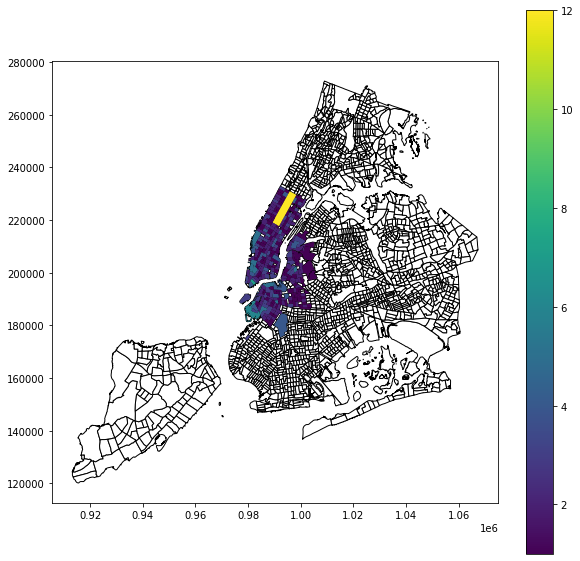

In [ ]:
#Here I can see the different boros, with the colors to dictate how many station per area
ctbycs = ct_shape.merge(cbstationsWct.groupby("boro_ct2010").count()[["ntacode"]], 
                        right_index=True, left_on="boro_ct2010")
ax = ct_shape.plot(ec="k", fc="w", figsize=(10,10))
ctbycs.plot(column="ntacode_y", legend=True, ax=ax)


(170000.0, 240000.0)

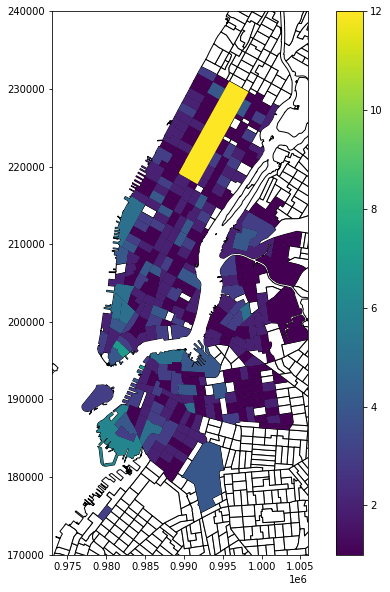

In [ ]:
#I made it bigger!
ctbycs = ct_shape.merge(cbstationsWct.groupby("boro_ct2010").count()[["ntacode"]], 
                        right_index=True, left_on="boro_ct2010")
ax = ct_shape.plot(ec="k", fc="w", figsize=(10,10))
ctbycs.plot(column="ntacode_y", legend=True, ax=ax)
ax.set_xlim(left=973000, right=1006000)
ax.set_ylim(top=240000, bottom=170000)

# FBB good